# Investigación 1

## Pattern Recognition MP6122 - Master of Science in Electronics - Emphasis on Embedded Systems

## Costa Rica TEC

Professor: MSc. Felipe Meza
Student: Randy Céspedes Deliyore - ID: 201054417

The choosen data set is named **Global Power Plant Database** and can be found [here](https://datasets.wri.org/dataset/globalpowerplantdatabase). This dataset is unprocessed and contains data of the power generation of 164 countries and over 30 000 plants, in which its possible to found the power generation capacity by plant and by  fuel type(hydro, gas, coal, etc.). This dataset was found by investigating about energy-related datasets in **Kaggle** and it was found that some other datasets have been generated after pre-processing this one.

## Data Preporcessing

First step is to load the libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Load the dataset:

In [2]:
power_plant = pd.read_csv("global_power_plant_database.csv")

Check the first Lines:

In [3]:
power_plant.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.3220,65.1190,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009793,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.5560,69.4787,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009795,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.6410,69.7170,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009797,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.4847,70.3633,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009787,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,34.5638,69.1134,Gas,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,NaN


**Note:** This dataset has multiple columns that contain repeated data. For this we get all column names:

In [4]:
power_plant[:0]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh


For example, columns like **country** (Country code) and **country_long** contain the same information. The column name **gppd_idnr** contains the country code and the plant **id number**, which is easier to handle than the **name**. 

Out of the 24 columns only the following are going to be use: country, gppd_idnr, capacity_mw, primary_fuel, latitude, longitude, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017.



In [5]:
simplified_pp = power_plant.drop(columns=['country_long','name','other_fuel1','other_fuel2','other_fuel3','commissioning_year','owner','source','url','geolocation_source','wepp_id','year_of_capacity_data'])

Here is a preview of the simplified dataset:

In [6]:
simplified_pp.head()

,country,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
0,AFG,GEODB0040538,33.00,32.3220,65.1190,Hydro,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,GEODB0040541,66.00,34.5560,69.4787,Hydro,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,GEODB0040534,100.00,34.6410,69.7170,Hydro,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,GEODB0040536,11.55,34.4847,70.3633,Hydro,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,GEODB0040540,42.00,34.5638,69.1134,Gas,NaN,NaN,NaN,NaN,NaN,NaN


**Number of plants per primary fuel type**

The first analysis to be done is to estimate the number of plants for each primary fuel type.

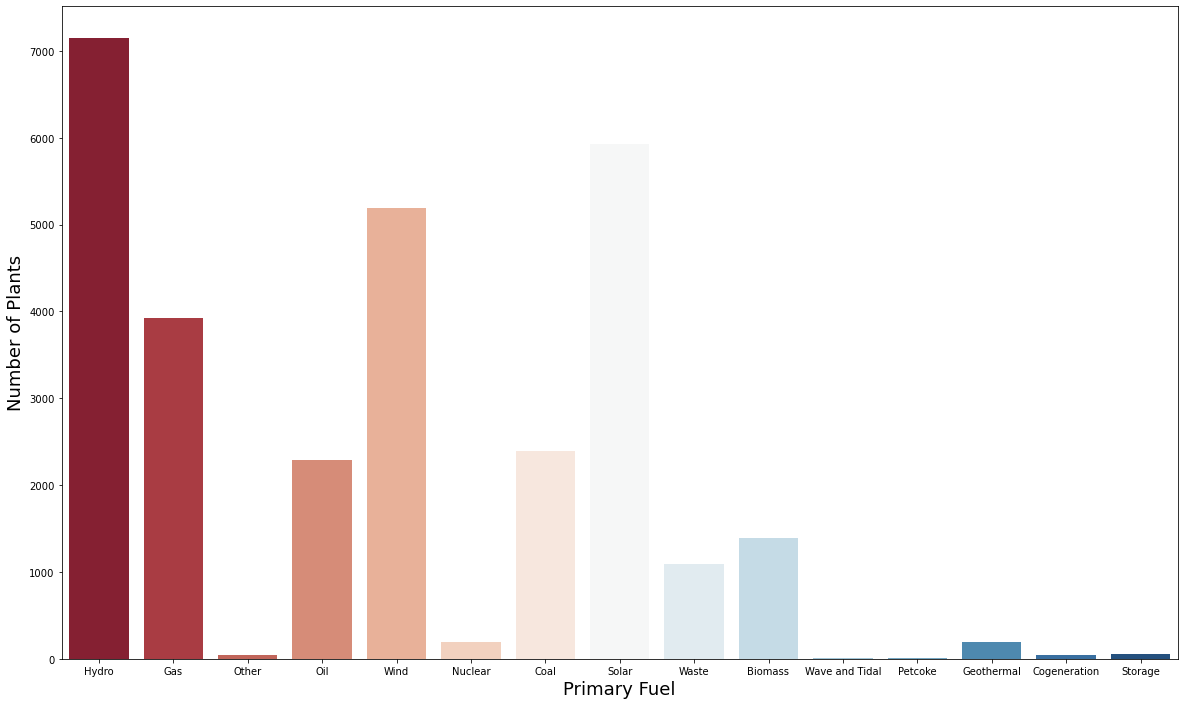

In [7]:
plt.figure(figsize=(20,12))
sns.countplot(x='primary_fuel',data=simplified_pp,palette='RdBu')
plt.xlabel("Primary Fuel",fontsize=18)
plt.ylabel("Number of Plants",fontsize=18)
plt.show()

In the figure above it can be see that the vast majority of plants worldwide are Hydroelectric.

In the next plot its possible to see the distrution of each plant by its type and generation capacity in MW. For example, its possible to see how several plants have values that separete a lot from the rest.

<Figure size 432x288 with 0 Axes>

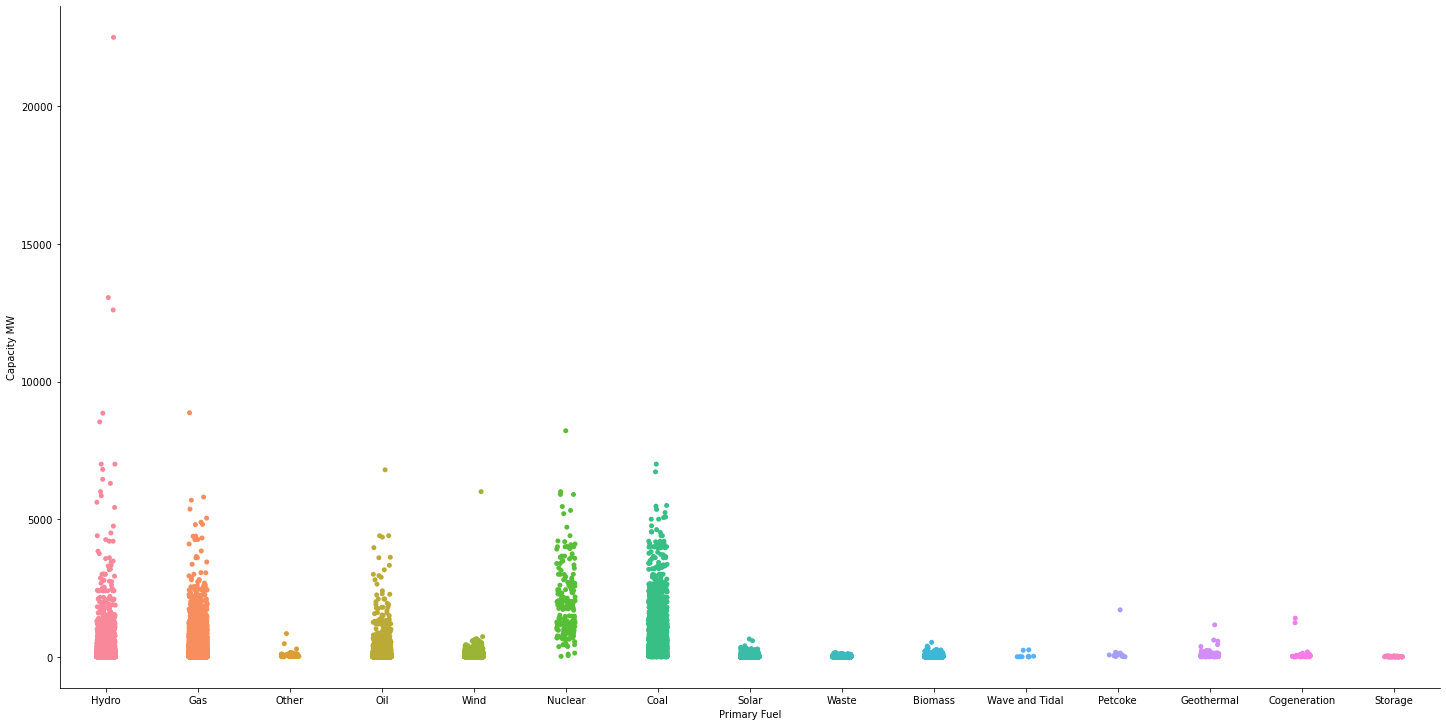

In [8]:
plt.figure()
g=sns.catplot(x='primary_fuel',y='capacity_mw',data=simplified_pp,ci=None,aspect=2,height=10)
(g.set_axis_labels('Primary Fuel', 'Capacity MW'))
plt.show()

From the plot above its possible to identify several outliers out of the scatter plots. We can evaluate each dataset idependently to eliminate them.

In [9]:
hydro_pp = simplified_pp.loc[simplified_pp['primary_fuel'] == 'Hydro']
gas_pp = simplified_pp.loc[simplified_pp['primary_fuel'] == 'Gas']
oil_pp = simplified_pp.loc[simplified_pp['primary_fuel'] == 'Oil']
wind_pp = simplified_pp.loc[simplified_pp['primary_fuel'] == 'Wind']
nuclear_pp = simplified_pp.loc[simplified_pp['primary_fuel'] == 'Nuclear']
coal_pp = simplified_pp.loc[simplified_pp['primary_fuel'] == 'Coal']
solar_pp = simplified_pp.loc[simplified_pp['primary_fuel'] == 'Solar']

### Hydro Power Plants - Exploratory Data Analysis

Being the Hydro Power Plants the major group, it was decided to start by it. First a current status of the data is calculated.

In [10]:
hydro_pp.describe()

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,7155.000000,7155.000000,7155.000000,1622.000000,1625.000000,1709.000000,1853.000000,1659.000000,5438.000000
mean,146.804321,30.309767,-5.565045,314.672623,256.312439,260.327471,254.284531,258.076518,649.839148
std,549.433962,26.058926,78.866409,1676.561830,980.130498,1052.683897,930.194372,980.094766,2548.580862
min,1.000000,-53.786200,-159.629400,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,0.967611
25%,5.300000,23.338300,-73.741550,8.299000,7.742000,7.670000,9.494000,9.445500,26.057324
50%,20.000000,39.655100,1.256100,33.196500,29.115000,31.797000,38.554000,36.078700,86.793675
75%,93.000000,46.285300,69.326450,170.286725,147.255000,158.901500,166.015750,158.727375,408.504385
max,22500.000000,70.372000,178.049800,50834.000000,20261.569000,22300.000000,19011.492000,20983.990000,92452.570325


<Figure size 432x288 with 0 Axes>

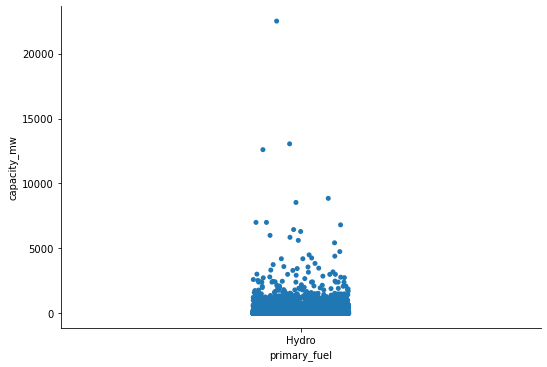

<AxesSubplot:>

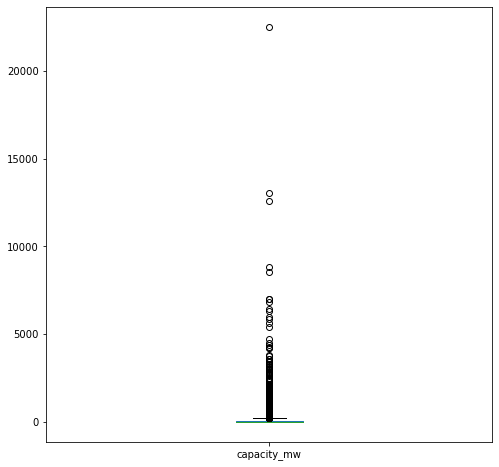

In [11]:
plt.figure()
hydro_pp_catplot=sns.catplot(x='primary_fuel',y='capacity_mw',data=hydro_pp,ci=None,aspect=1.5,height=5)
(g.set_axis_labels('Primary Fuel', 'Capacity MW'))
plt.show()
hydro_pp['capacity_mw'].plot.box(figsize=(8,8))

By doing the box plot of the data its possible to see how there is an issue on how the data is distributed. This issue is mainly due to the fact that there is a large disparity between the capacity of different power plants. 

One of the ideas to make the analysis of the data easier is to divide the data in two groups based on the statitic values above. Its propose to divide the data in three groups: **small capacity** (Up to 50 MW), **medium capacity** (50 MW to 500 MW), **large capacity** (500 MW to 2250 MW), and **very large capacity** (> 2250 MW).

The other idea is to use the interquartile range which consiste on taking the values between Q1 and Q3.

#### Divinding Hydro Power Plants in Groups

<Figure size 432x288 with 0 Axes>

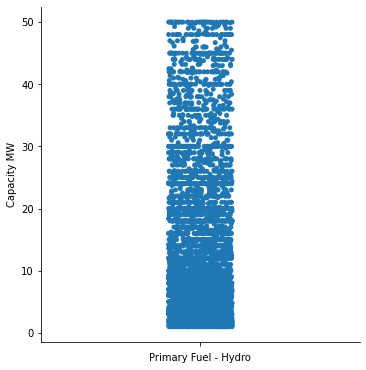

Text(0.5, 1.0, 'Box Plot Small Capacity Hydro')

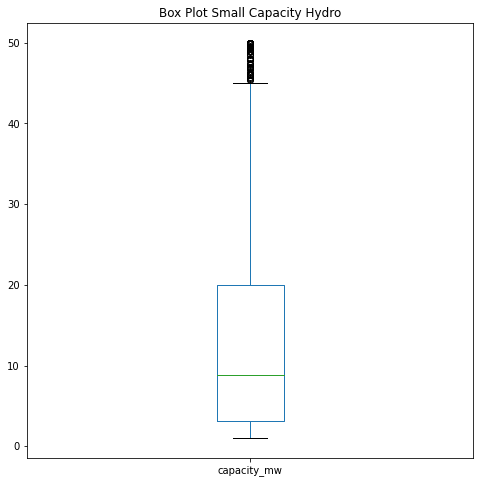

In [12]:
hydro_pp_small = hydro_pp[hydro_pp['capacity_mw'] <= 50]
plt.figure()
g=sns.catplot(y='capacity_mw',data=hydro_pp_small,ci=None,aspect=1,height=5)
(g.set_axis_labels('Primary Fuel - Hydro', 'Capacity MW'))
plt.show()
plt.figure()
hydro_box_fig = hydro_pp_small['capacity_mw'].plot.box(figsize=(8,8))
hydro_box_fig.set_title('Box Plot Small Capacity Hydro')

<Figure size 432x288 with 0 Axes>

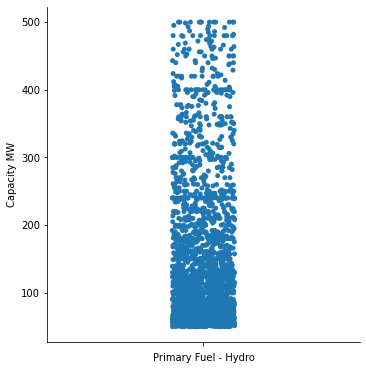

Text(0.5, 1.0, 'Box Plot Medium Capacity Hydro')

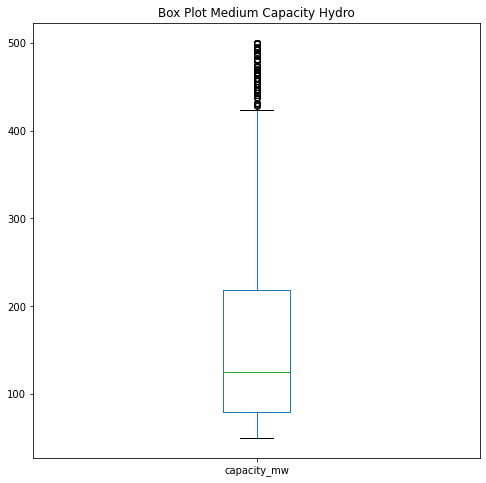

In [13]:
hydro_pp_medium = hydro_pp[hydro_pp['capacity_mw'].between(50,500,inclusive=True)]
plt.figure()
g=sns.catplot(y='capacity_mw',data=hydro_pp_medium,ci=None,aspect=1,height=5)
(g.set_axis_labels('Primary Fuel - Hydro', 'Capacity MW'))
plt.show()
plt.figure()
hydro_box_fig = hydro_pp_medium['capacity_mw'].plot.box(figsize=(8,8))
hydro_box_fig.set_title('Box Plot Medium Capacity Hydro')

<Figure size 432x288 with 0 Axes>

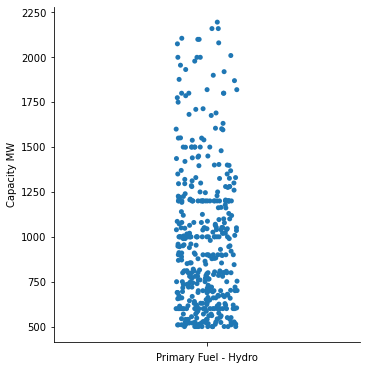

Text(0.5, 1.0, 'Box Plot High Capacity wasHydro')

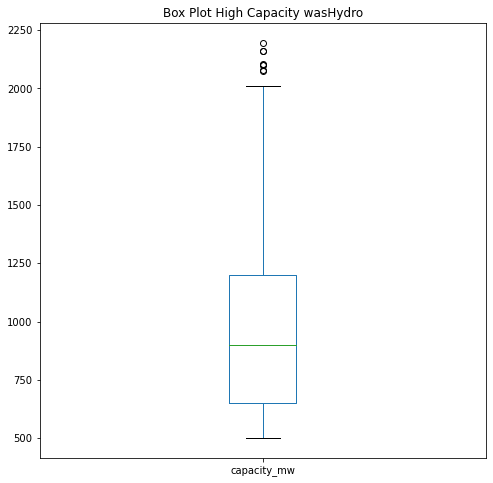

In [14]:
hydro_pp_large = hydro_pp[hydro_pp['capacity_mw'].between(500,2250,inclusive=True)]
plt.figure()
g=sns.catplot(y='capacity_mw',data=hydro_pp_large,ci=None,aspect=1,height=5)
(g.set_axis_labels('Primary Fuel - Hydro', 'Capacity MW'))
plt.show()
plt.figure()
hydro_box_fig = hydro_pp_large['capacity_mw'].plot.box(figsize=(8,8))
hydro_box_fig.set_title('Box Plot High Capacity Hydro')

<Figure size 432x288 with 0 Axes>

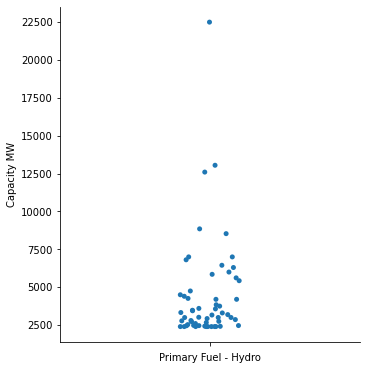

Text(0.5, 1.0, 'Box Plot Very Large Capacity Hydro')

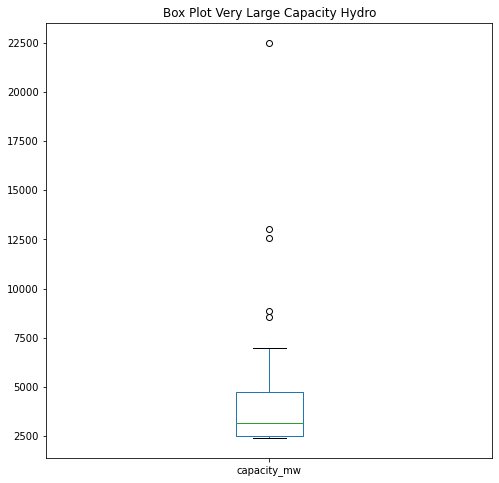

In [15]:
hydro_pp_verylarge = hydro_pp[hydro_pp['capacity_mw']>2250]
plt.figure()
g=sns.catplot(y='capacity_mw',data=hydro_pp_verylarge,ci=None,aspect=1,height=5)
(g.set_axis_labels('Primary Fuel - Hydro', 'Capacity MW'))
plt.show()
plt.figure()
hydro_box_fig = hydro_pp_verylarge['capacity_mw'].plot.box(figsize=(8,8))
hydro_box_fig.set_title('Box Plot Very Large Capacity Hydro')

#### Using Interquartile Range in Hydro Power Plants

This method to remove the outliers is described [here](https://www.mathworks.com/matlabcentral/cody/problems/42485-eliminate-outliers-using-interquartile-range).

Text(0.5, 1.0, 'Box Plot IQR Hydro')

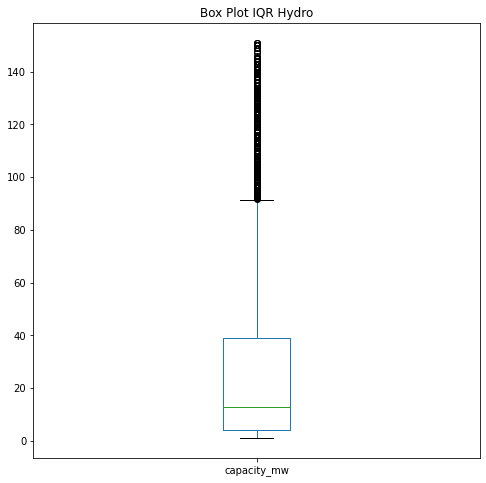

In [16]:
Hydro_Q1 = hydro_pp['capacity_mw'].quantile(.25)
Hydro_Q3 = hydro_pp['capacity_mw'].quantile(.75)
Hydro_Median = hydro_pp['capacity_mw'].median()
IQR = Hydro_Q3 - Hydro_Q1
lower_IQR = Hydro_Median-(1.5*IQR)
upper_IQR = Hydro_Median+(1.5*IQR)
hydro_pp_IQR = hydro_pp[hydro_pp['capacity_mw'].between(lower_IQR,upper_IQR,inclusive=True)]
plt.figure()
hydro_box_fig = hydro_pp_IQR['capacity_mw'].plot.box(figsize=(8,8))
hydro_box_fig.set_title('Box Plot IQR Hydro')

In [17]:
hydro_pp_IQR.describe()

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,5884.000000,5884.000000,5884.000000,1415.000000,1420.000000,1462.000000,1610.000000,1454.000000,4389.000000
mean,28.750278,30.511910,-11.269078,83.401254,77.470980,77.912474,82.937597,86.061443,125.412915
std,35.708698,26.326029,77.535398,139.218349,128.175004,128.905647,126.195974,135.501731,200.656512
min,1.000000,-45.881600,-159.629400,-29.413000,-9.074000,-12.771000,-50.859000,-105.768000,0.967611
25%,4.000000,23.908100,-75.420800,7.500000,7.068500,6.632000,8.285750,8.593750,18.966771
50%,12.800000,40.698550,-4.784300,26.034000,23.602000,23.101000,28.708000,28.031000,56.214274
75%,39.000000,46.305075,29.286100,97.589600,89.338500,90.021838,100.992075,100.264750,155.416017
max,151.000000,70.372000,178.027000,2156.905278,1468.888333,1055.098611,1256.454167,1017.208000,4797.783983


Using this method allows to get 5884 power plants of the orignal 7000.This method was very effective so it was decided to apply it to the whole data set.

### All Plants

Knowing the good effect that the IRQ methodology has on removing the outliers, it was decided to use this methodology on all the plants.

<Figure size 432x288 with 0 Axes>

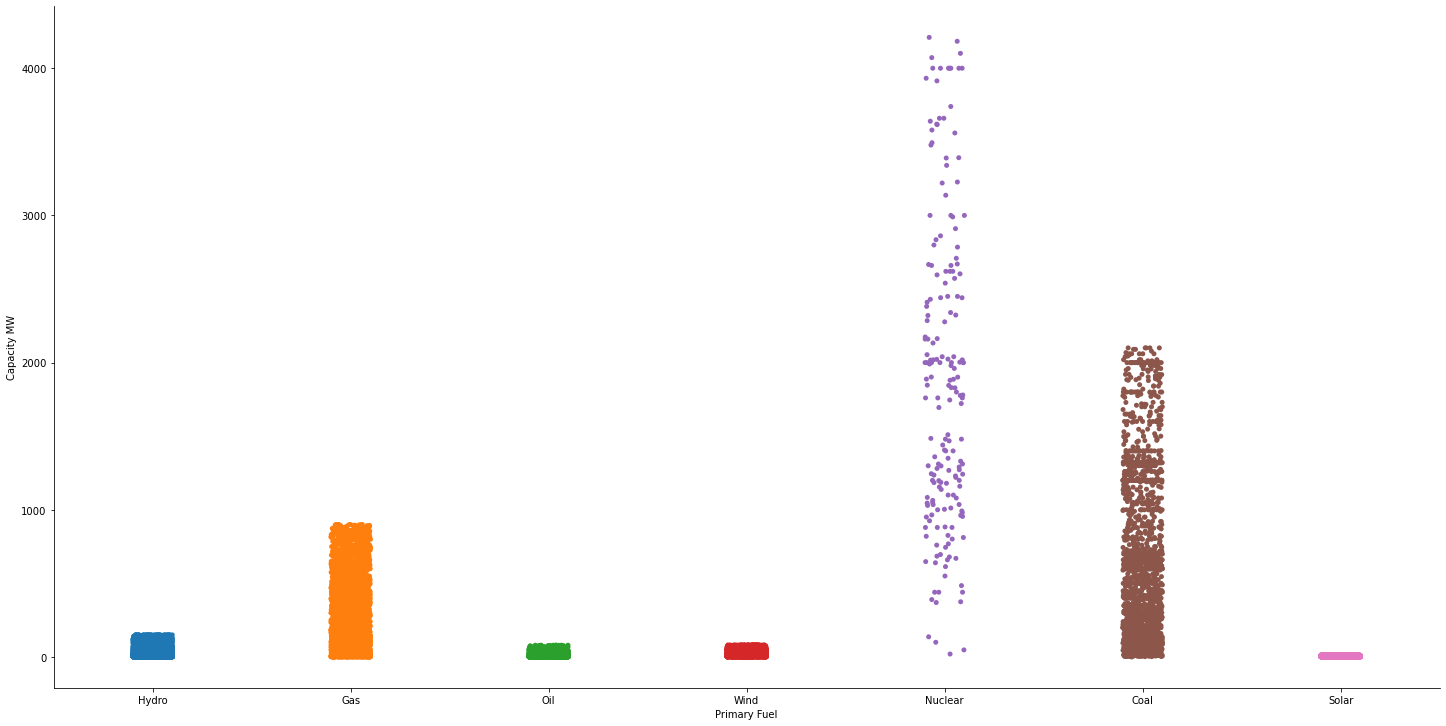

In [19]:
# Fuel types to process:
# gas_pp
# oil_pp
# wind_pp
# nuclear_pp
# coal_pp
# solar_pp

# Gas

Gas_IQR = gas_pp['capacity_mw'].quantile(.75) - gas_pp['capacity_mw'].quantile(.25)
lower_IQR = gas_pp['capacity_mw'].median()-(1.5*Gas_IQR)
upper_IQR = gas_pp['capacity_mw'].median()+(1.5*Gas_IQR)
gas_pp_IQR = gas_pp[gas_pp['capacity_mw'].between(lower_IQR,upper_IQR,inclusive=True)]

# Oil 

Oil_IQR = oil_pp['capacity_mw'].quantile(.75) - oil_pp['capacity_mw'].quantile(.25)
lower_IQR = oil_pp['capacity_mw'].median()-(1.5*Oil_IQR)
upper_IQR = oil_pp['capacity_mw'].median()+(1.5*Oil_IQR)
oil_pp_IQR = oil_pp[oil_pp['capacity_mw'].between(lower_IQR,upper_IQR,inclusive=True)]

# Wind

Wind_IQR = wind_pp['capacity_mw'].quantile(.75) - wind_pp['capacity_mw'].quantile(.25)
lower_IQR = wind_pp['capacity_mw'].median()-(1.5*Wind_IQR)
upper_IQR = wind_pp['capacity_mw'].median()+(1.5*Wind_IQR)
wind_pp_IQR = wind_pp[wind_pp['capacity_mw'].between(lower_IQR,upper_IQR,inclusive=True)]

# Nuclear

Nuclear_IQR = nuclear_pp['capacity_mw'].quantile(.75) - nuclear_pp['capacity_mw'].quantile(.25)
lower_IQR = nuclear_pp['capacity_mw'].median()-(1.5*Nuclear_IQR)
upper_IQR = nuclear_pp['capacity_mw'].median()+(1.5*Nuclear_IQR)
nuclear_pp_IQR = nuclear_pp[nuclear_pp['capacity_mw'].between(lower_IQR,upper_IQR,inclusive=True)]

# Coal

Coal_IQR = coal_pp['capacity_mw'].quantile(.75) - coal_pp['capacity_mw'].quantile(.25)
lower_IQR = coal_pp['capacity_mw'].median()-(1.5*Coal_IQR)
upper_IQR = coal_pp['capacity_mw'].median()+(1.5*Coal_IQR)
coal_pp_IQR = coal_pp[coal_pp['capacity_mw'].between(lower_IQR,upper_IQR,inclusive=True)]

# Solar
Solar_IQR = solar_pp['capacity_mw'].quantile(.75) - solar_pp['capacity_mw'].quantile(.25)
lower_IQR = solar_pp['capacity_mw'].median()-(1.5*Solar_IQR)
upper_IQR = solar_pp['capacity_mw'].median()+(1.5*Solar_IQR)
solar_pp_IQR = solar_pp[solar_pp['capacity_mw'].between(lower_IQR,upper_IQR,inclusive=True)]


# Merge all the datasets again

datasets = [hydro_pp_IQR,gas_pp_IQR,oil_pp_IQR,wind_pp_IQR,nuclear_pp_IQR,coal_pp_IQR,solar_pp_IQR]

modified_datasets = pd.concat(datasets)

plt.figure()
g=sns.catplot(x='primary_fuel',y='capacity_mw',data=modified_datasets,ci=None,aspect=2,height=10)
(g.set_axis_labels('Primary Fuel', 'Capacity MW'))
plt.show()

Having the dataset organized like this would, it would be easier to perform operations since the data is better distributed and without so many outliers. Even though there are some hydro prower plants with high generation capacity, in averge nuclear and coal power plants have higher average generating capacity.

Having the date preprocessed it could be easier to make studies like: main type of power plant per country, type of primary fuel vs latitude, etc.

In [20]:
modified_datasets.describe()

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,23126.000000,23126.000000,23126.000000,5360.000000,5689.000000,6194.000000,6822.000000,7003.000000,16858.000000
mean,123.991780,33.129284,-11.170695,572.575599,546.690135,556.049614,486.556934,476.260327,572.737549
std,327.197753,23.404788,76.339741,2018.159010,1969.855317,2050.302703,1854.390846,1813.464720,3890.900702
min,1.000000,-77.847000,-179.977700,-29.413000,-262.902000,-141.014000,-127.507000,-132.033000,0.000000
25%,4.000000,30.085050,-77.738750,1.305750,1.386000,1.572470,1.621500,2.285000,8.135291
50%,12.800000,40.706800,-3.363000,14.475500,11.455000,10.622500,9.525500,9.883000,39.920126
75%,55.000000,47.373275,23.469425,143.372472,124.221000,124.055750,102.171477,95.116000,193.794650
max,4209.600000,71.292000,178.835900,31431.080000,32320.917000,59546.865000,32377.477000,32340.138000,450562.692350
